In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df = pd.read_csv(r'data/healthcare-dataset-stroke-data.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.stroke.value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [5]:
df.shape

(5110, 12)

In [6]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


EXPLORING DATA

In [8]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 7 numerical features : ['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

We have 5 categorical features : ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [15]:
# proportion of count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

gender
Female    58.590998
Male      41.389432
Other      0.019569
Name: proportion, dtype: float64
---------------------------
ever_married
Yes    65.616438
No     34.383562
Name: proportion, dtype: float64
---------------------------
work_type
Private          57.240705
Self-employed    16.027397
children         13.444227
Govt_job         12.857143
Never_worked      0.430528
Name: proportion, dtype: float64
---------------------------
Residence_type
Urban    50.802348
Rural    49.197652
Name: proportion, dtype: float64
---------------------------
smoking_status
never smoked       37.025440
Unknown            30.215264
formerly smoked    17.318982
smokes             15.440313
Name: proportion, dtype: float64
---------------------------
hypertension
0    90.254403
1     9.745597
Name: proportion, dtype: float64
---------------------------
heart_disease
0    94.598826
1     5.401174
Name: proportion, dtype: float64
---------------------------
stroke
0    95.127202
1     4.872798
Name: 

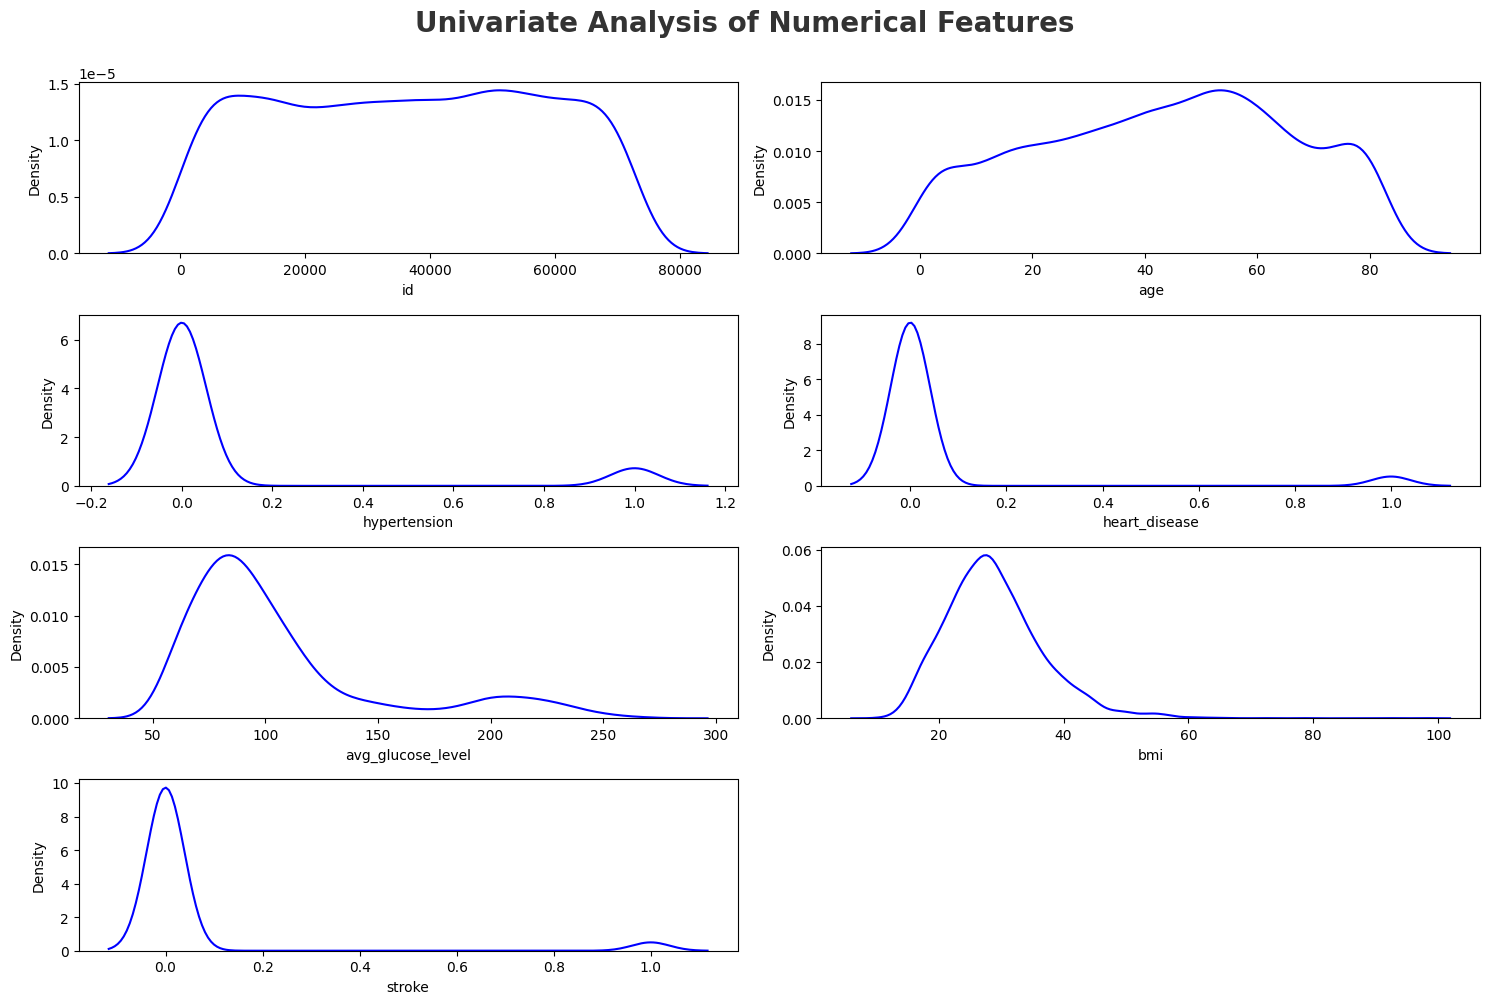

In [16]:
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(4, 2, i+1)
    sns.kdeplot(x=df[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()
    
# save plot
plt.savefig('./images/Univariate_Num.png')

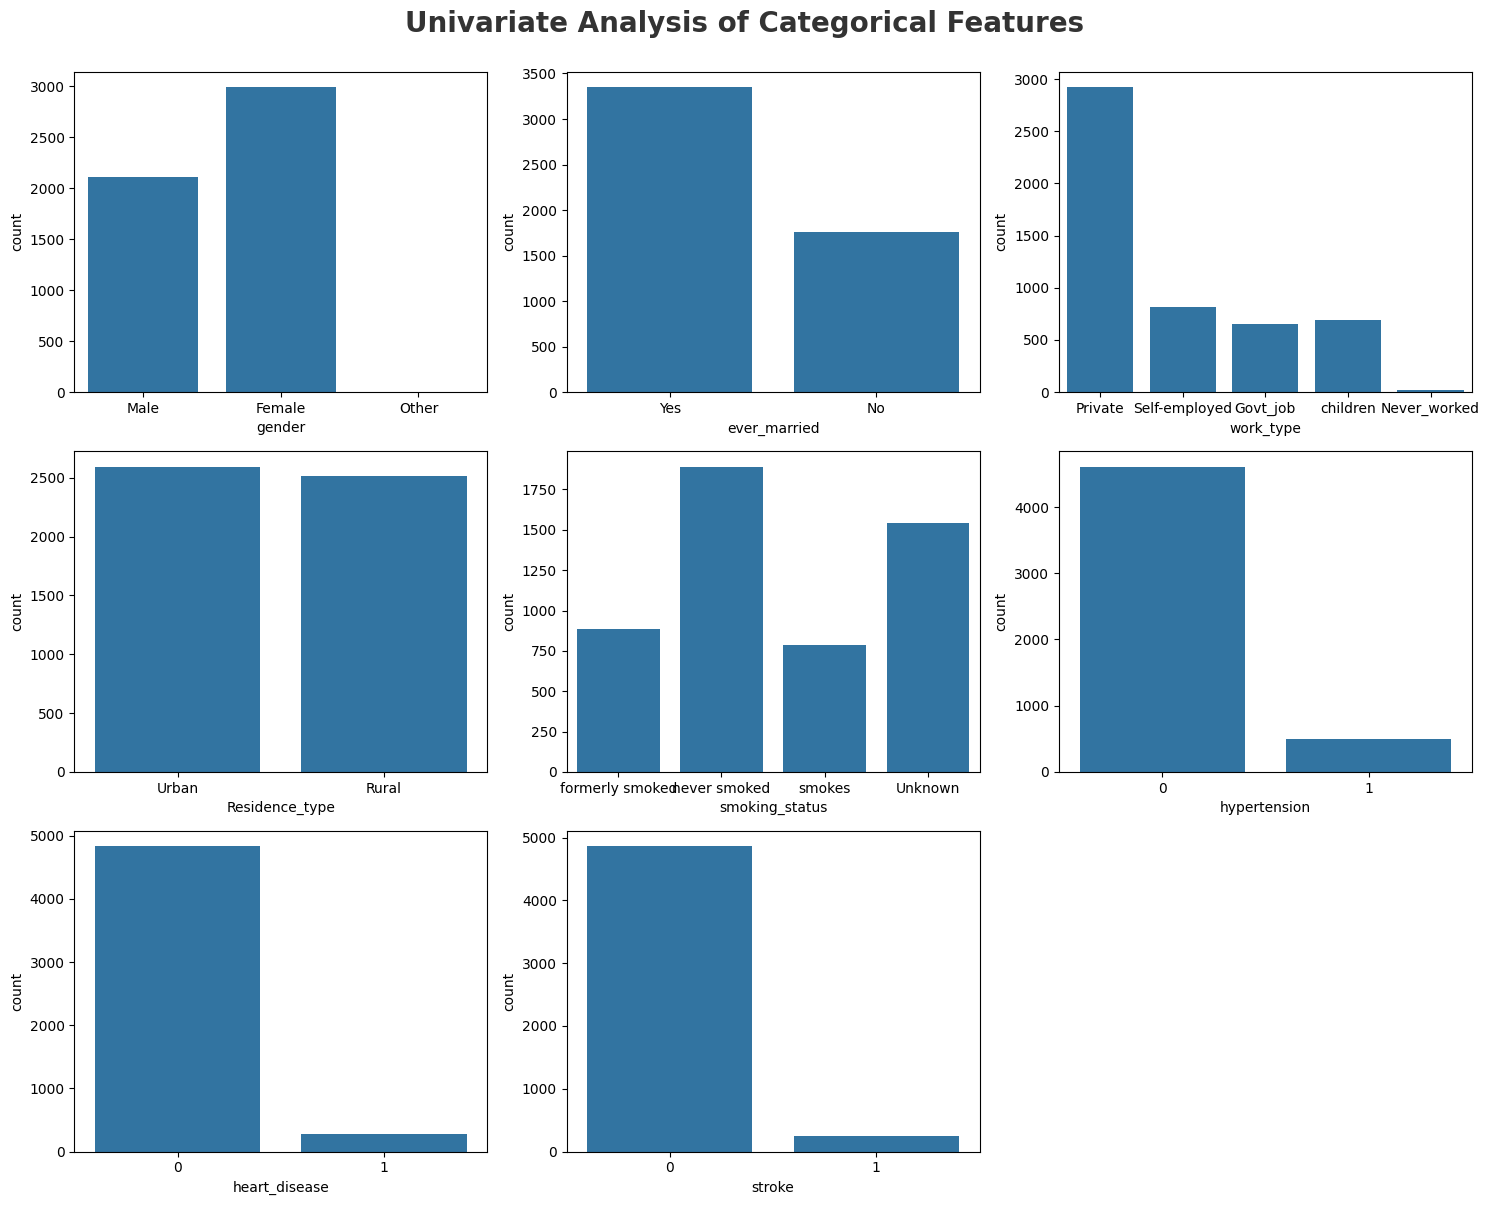

In [17]:
import math

num_cats = len(categorical_features)
cols = 3
rows = math.ceil(num_cats / cols)

plt.figure(figsize=(5 * cols, 4 * rows))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(num_cats):
    plt.subplot(rows, cols, i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout()

# save plot
plt.savefig('./images/Univariate_Cat.png')

In [18]:
discrete_features=[feature for feature in numeric_features if (len(df[feature].unique())<=25 and len(df[feature].unique())>5)]

continuous_features=[feature for feature in numeric_features if len(df[feature].unique()) > 25]

encoded_categorical = [feature for feature in numeric_features if len(df[feature].unique()) <=5]

print('We have {} discrete features : {}'.format(len(discrete_features), discrete_features))
print('\nWe have {} continuous_features : {}'.format(len(continuous_features), continuous_features))
print('\nWe have {} encoded_categorical : {}'.format(len(encoded_categorical), encoded_categorical))

We have 0 discrete features : []

We have 4 continuous_features : ['id', 'age', 'avg_glucose_level', 'bmi']

We have 3 encoded_categorical : ['hypertension', 'heart_disease', 'stroke']


In [19]:
categorical_features = categorical_features + encoded_categorical
print(categorical_features)

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'hypertension', 'heart_disease', 'stroke', 'hypertension', 'heart_disease', 'stroke']


Check Multicollinearity in Numerical features

In [20]:
df[(list(df[continuous_features])[1:])].corr()

,age,avg_glucose_level,bmi
age,1.000000,0.238171,0.333398
avg_glucose_level,0.238171,1.000000,0.175502
bmi,0.333398,0.175502,1.000000


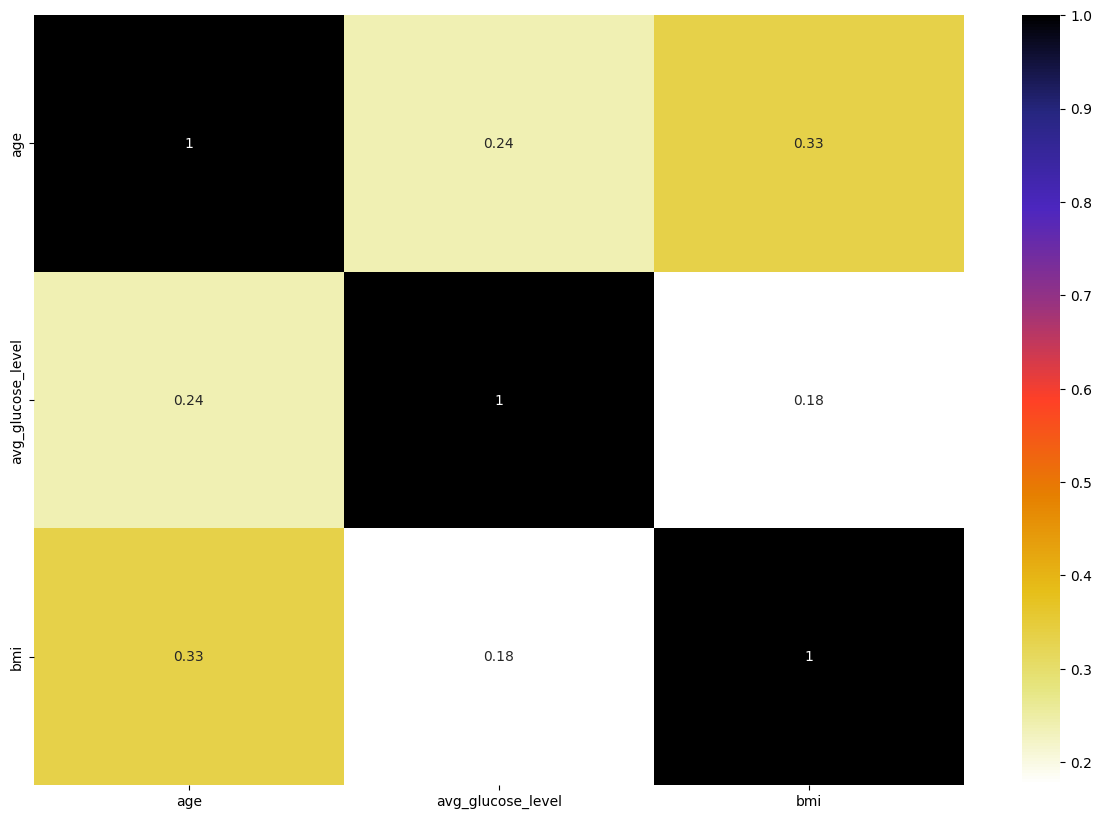

In [21]:
plt.figure(figsize = (15,10))
cont_features = continuous_features.copy()
cont_features.remove('id')
sns.heatmap(df[cont_features].corr(), cmap="CMRmap_r", annot=True)
plt.show()

In [22]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['stroke'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,gender,Fail to Reject Null Hypothesis
1,ever_married,Reject Null Hypothesis
2,work_type,Reject Null Hypothesis
3,Residence_type,Fail to Reject Null Hypothesis
4,smoking_status,Reject Null Hypothesis
5,hypertension,Reject Null Hypothesis
6,heart_disease,Reject Null Hypothesis
7,stroke,Reject Null Hypothesis
8,hypertension,Reject Null Hypothesis
9,heart_disease,Reject Null Hypothesis


In [24]:
df1 = df.copy()
df1.gender = np.where(df.gender == 'Other', 'Female', df.gender)

In [25]:
chi2_contingency(pd.crosstab(df1['stroke'], df1['gender']))

Chi2ContingencyResult(statistic=0.34312923759376157, pvalue=0.5580285118426893, dof=1, expected_freq=array([[2849.05968689, 2011.94031311],
       [ 145.94031311,  103.05968689]]))

Checking Null Values

In [26]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

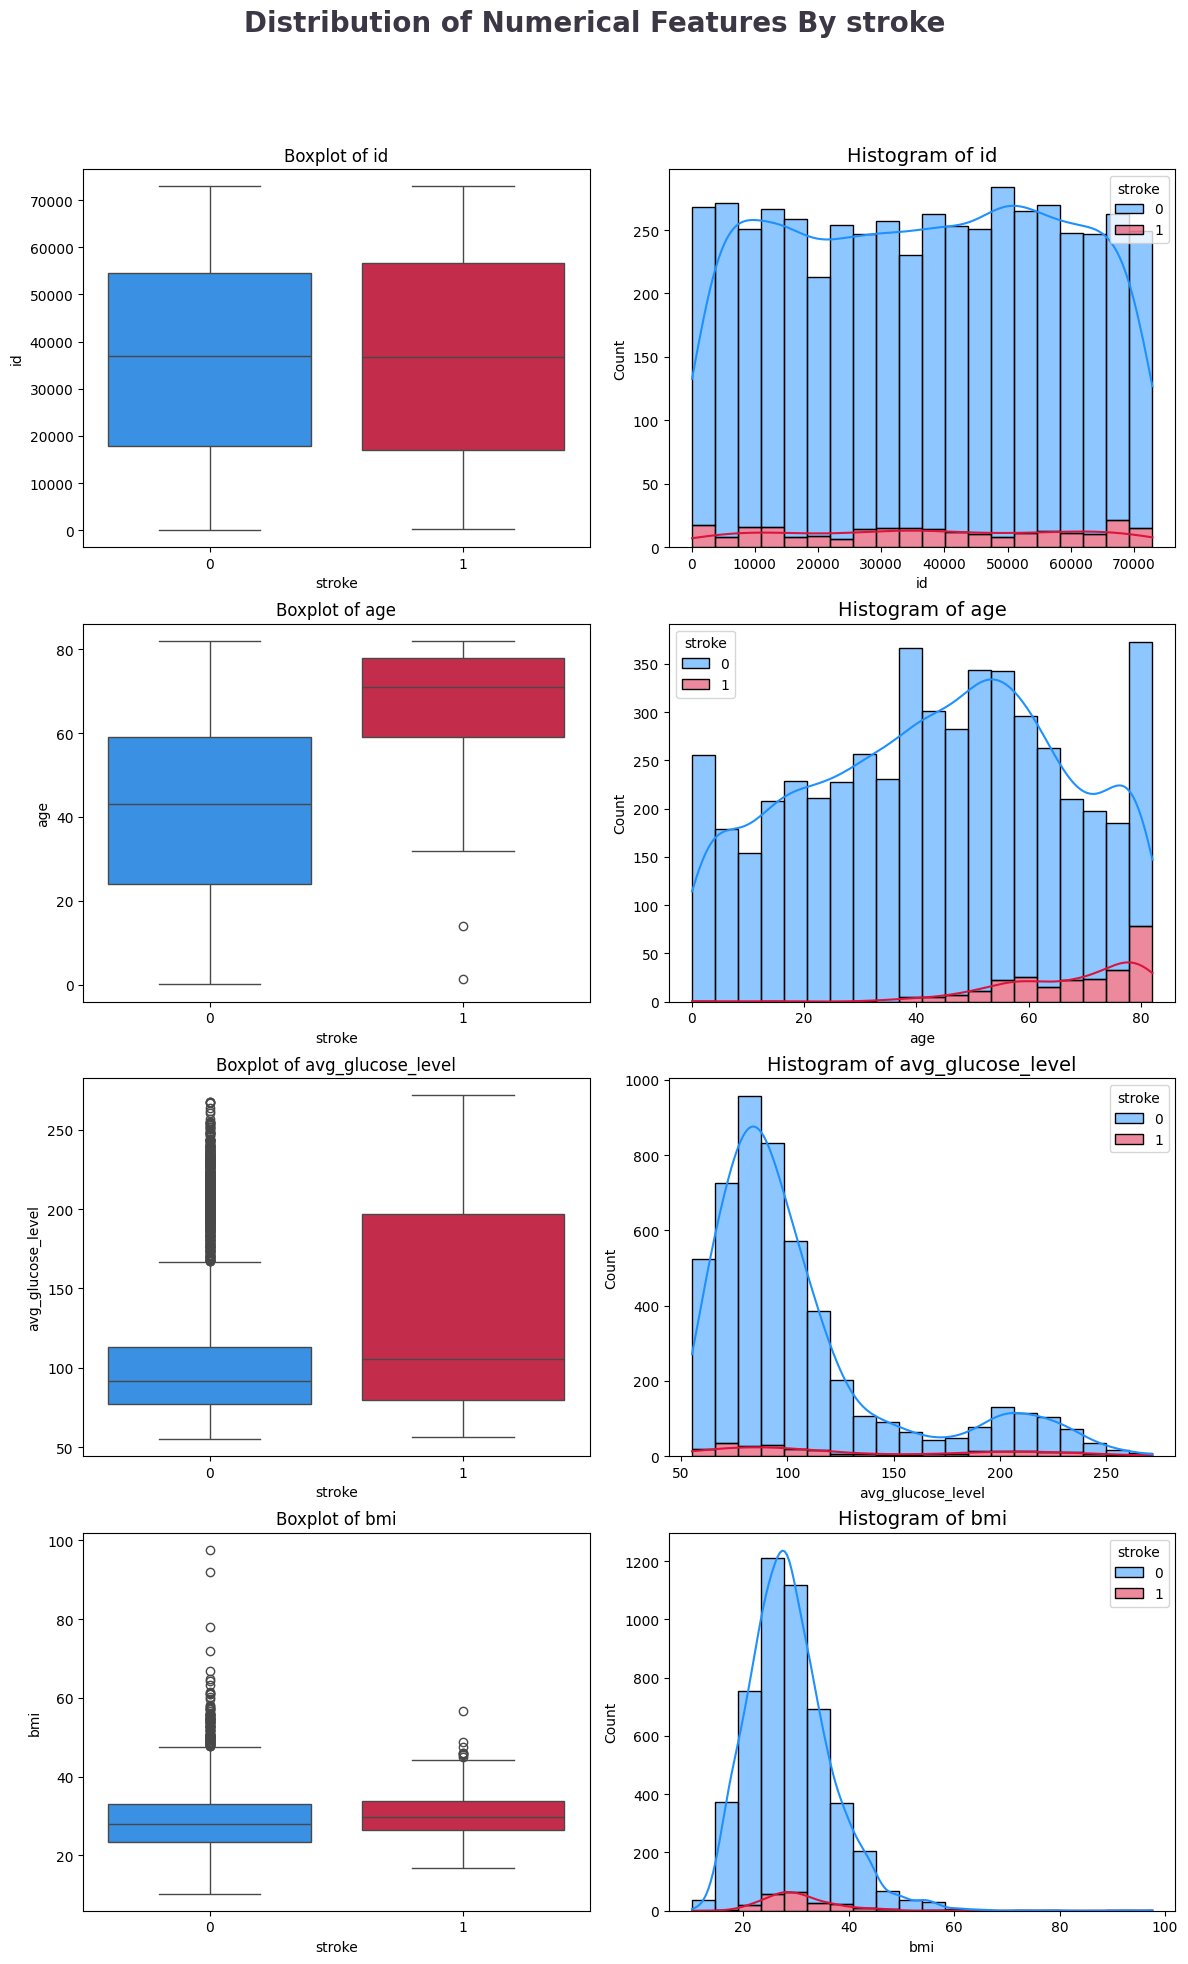

In [27]:
clr1 = ['#1E90FF', '#DC143C']
fig, ax = plt.subplots(4, 2, figsize=(12,20))
fig.suptitle('Distribution of Numerical Features By stroke', color='#3C3744',
             fontsize=20, fontweight='bold', ha='center')
for i, col in enumerate(continuous_features):   
    sns.boxplot(data=df, x='stroke', y=col,  palette=clr1, ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}', fontsize=12)
    sns.histplot(data=df, x=col, hue='stroke', bins=20, kde=True, 
                 multiple='stack', palette=clr1, ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}', fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.90)
# plt.savefig('images/multivariate_num.png')

Visualization

Visualize the Target Feature

In [29]:
df1 = df.copy()
df1['stroke'] = np.where((df.stroke == 1),'Stroke', 'Not-Stroke' )

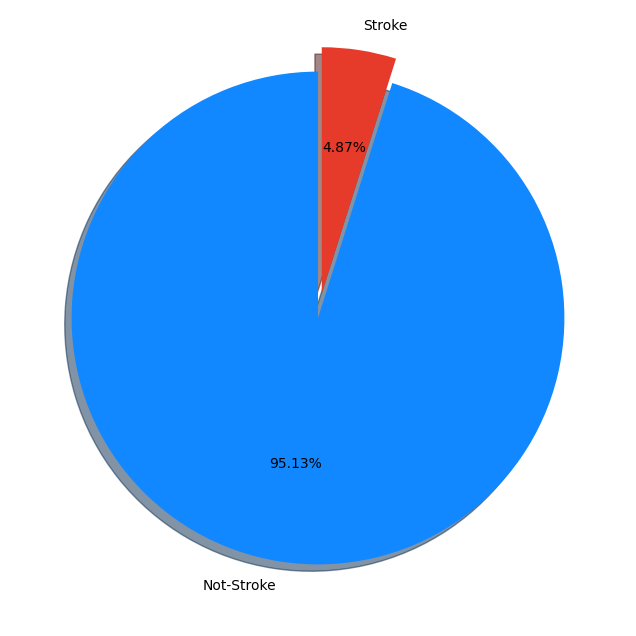

In [30]:
percentage = df1.stroke.value_counts(normalize=True)*100
label = ["Not-Stroke", "Stroke"]

# Plot PieChart with Ploty library
fig, ax = plt.subplots(figsize =(15, 8))
explode = (0, 0.1)
colors = ['#1188ff', '#e63a2a']
ax.pie(percentage, labels = label, startangle = 90,
       autopct='%1.2f%%',explode=explode, shadow=True, colors=colors)
plt.show()

Do Men or Women have more chance of stroke?

In [31]:
df1.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [32]:
df1[df1.stroke == 'Stroke'].gender.value_counts(normalize=True)

gender
Female    0.566265
Male      0.433735
Name: proportion, dtype: float64

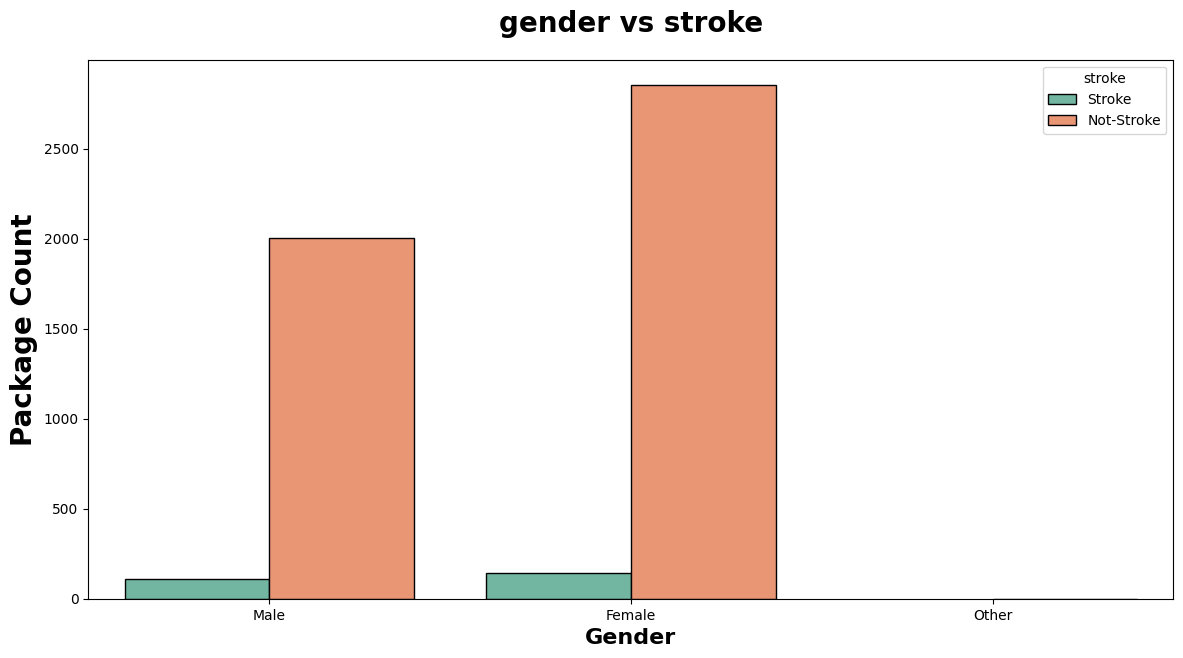

In [33]:
plt.subplots(figsize=(14,7))
sns.countplot(x="gender",hue="stroke", data=df1,ec = "black",palette="Set2")
plt.title("gender vs stroke", weight="bold",fontsize=20, pad=20)
plt.ylabel("Package Count", weight="bold", fontsize=20)
plt.xlabel("Gender", weight="bold", fontsize=16)
plt.show()

AGE Category Split

In [34]:
bins= [0,10,20,50,85]
labels = ['Children','Teens','Adult','Senior']
df2 = df.copy()
df2['age_cat'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
age_group = df2.groupby(['age_cat', 'stroke'])['id'].count().reset_index(name='count')
age_group

,age_cat,stroke,count
0,Children,0,471
1,Children,1,1
2,Teens,0,493
3,Teens,1,1
4,Adult,0,1916
5,Adult,1,18
6,Senior,0,1981
7,Senior,1,229


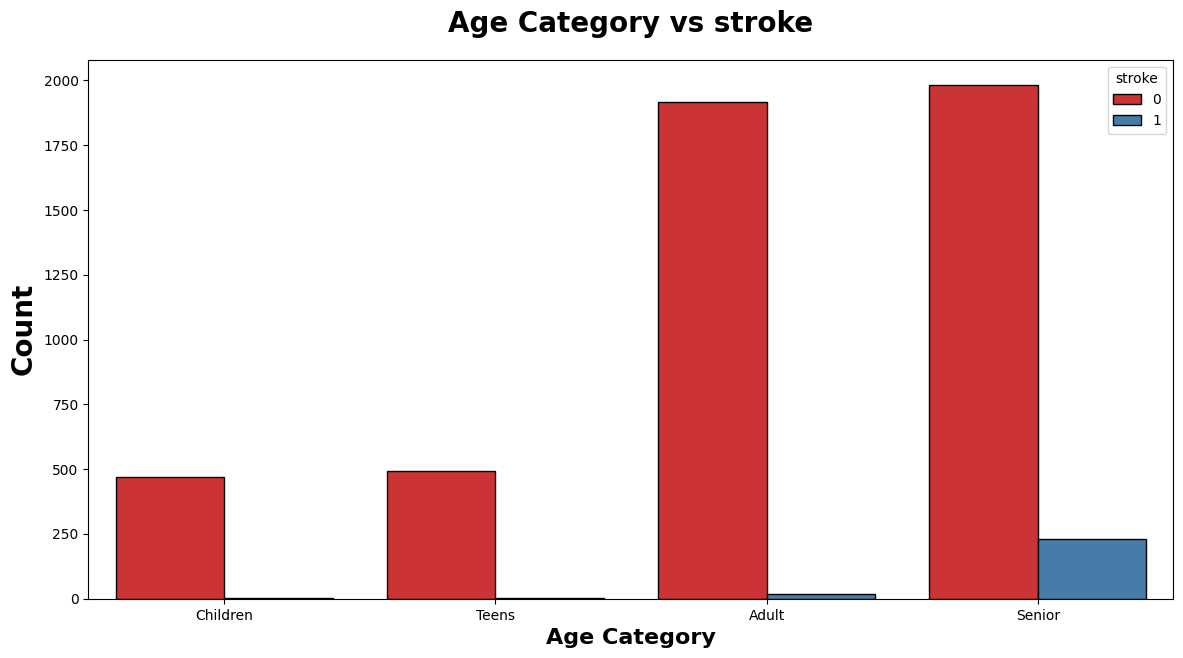

In [35]:
plt.subplots(figsize=(14,7))
sns.countplot(x="age_cat",hue="stroke", data=df2,ec = "black",palette="Set1")
plt.title("Age Category vs stroke", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("Age Category", weight="bold", fontsize=16)
plt.show()

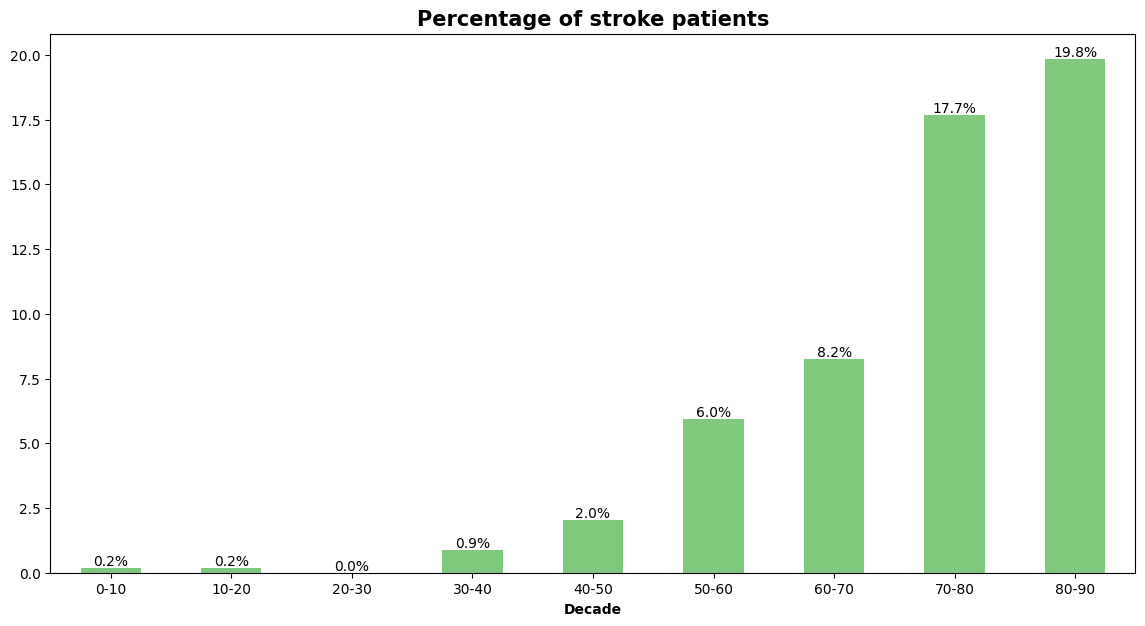

In [36]:
df2= df.copy()
bins=[0,10,20,30,40,50,60,70,80,90]
labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90']
df2['age_group']=pd.cut(df['age'],bins=bins,labels=labels)

import matplotlib.ticker as mtick

plt.figure(figsize=[14,7])

(100*df2[df2["stroke"].isin([1])]['age_group'].value_counts()/df2['age_group'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of stroke patients" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["stroke"].isin([1])]['age_group'].value_counts()/df2['age_group'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('Decade' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

Does HyperTension makes any difference

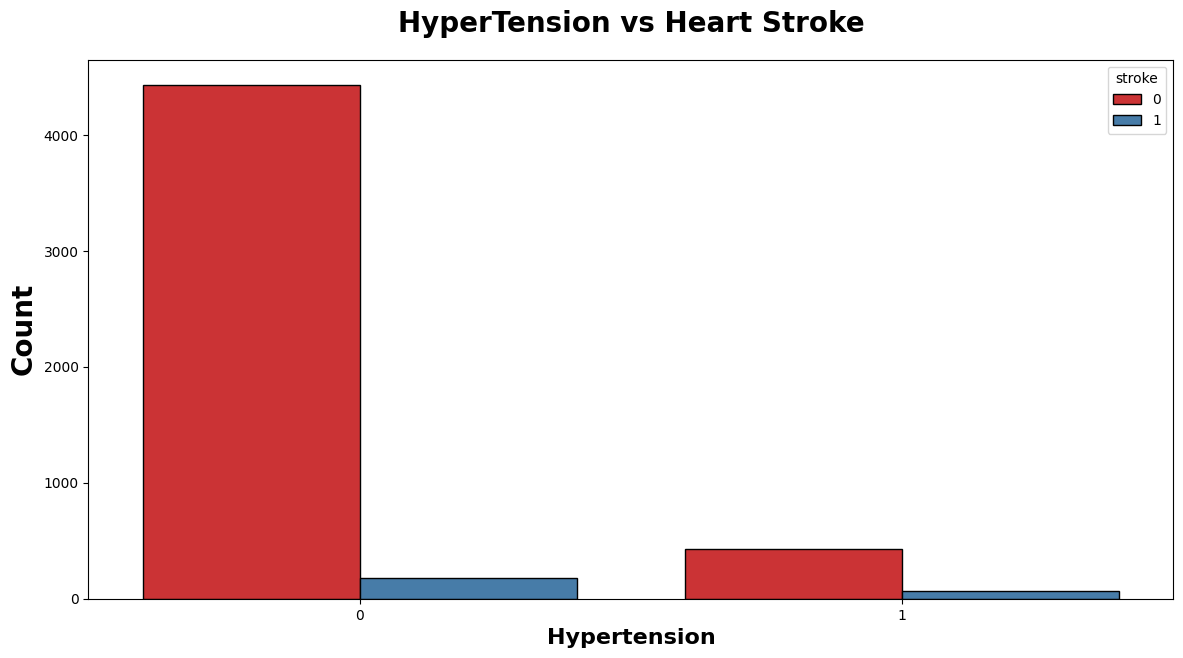

In [37]:
plt.subplots(figsize=(14,7))
sns.countplot(x="hypertension", data=df2,ec = "black",palette="Set1", hue='stroke')
plt.title("HyperTension vs Heart Stroke", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("Hypertension", weight="bold", fontsize=16)
plt.show()

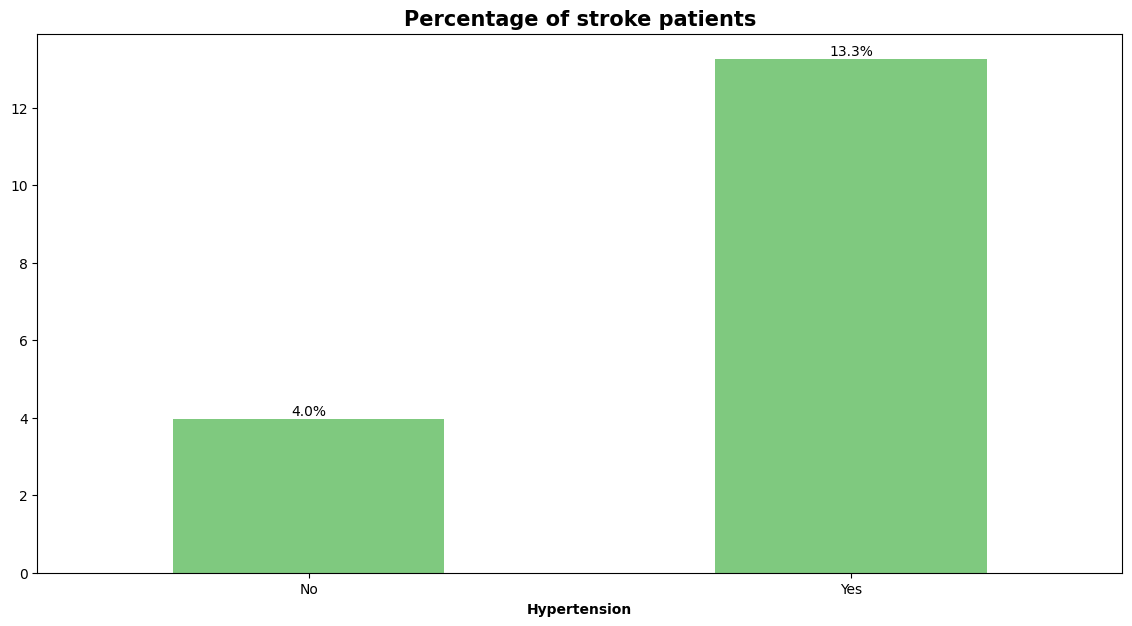

In [38]:
plt.subplots(figsize=(14,7))

(100*df2[df2["stroke"].isin([1])]['hypertension'].value_counts()/df2['hypertension'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of stroke patients" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["stroke"].isin([1])]['hypertension'].value_counts()/df2['hypertension'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')
    
plt.xlabel('Hypertension' , fontweight ='bold')
plt.xticks(ticks=[0,1], labels=['No', 'Yes'] ,rotation=0)
plt.show()

Impact of BMI

BMI parameter can be divided into four categories [ Under_weight / Normal_weight / Over_weight / Obese ]

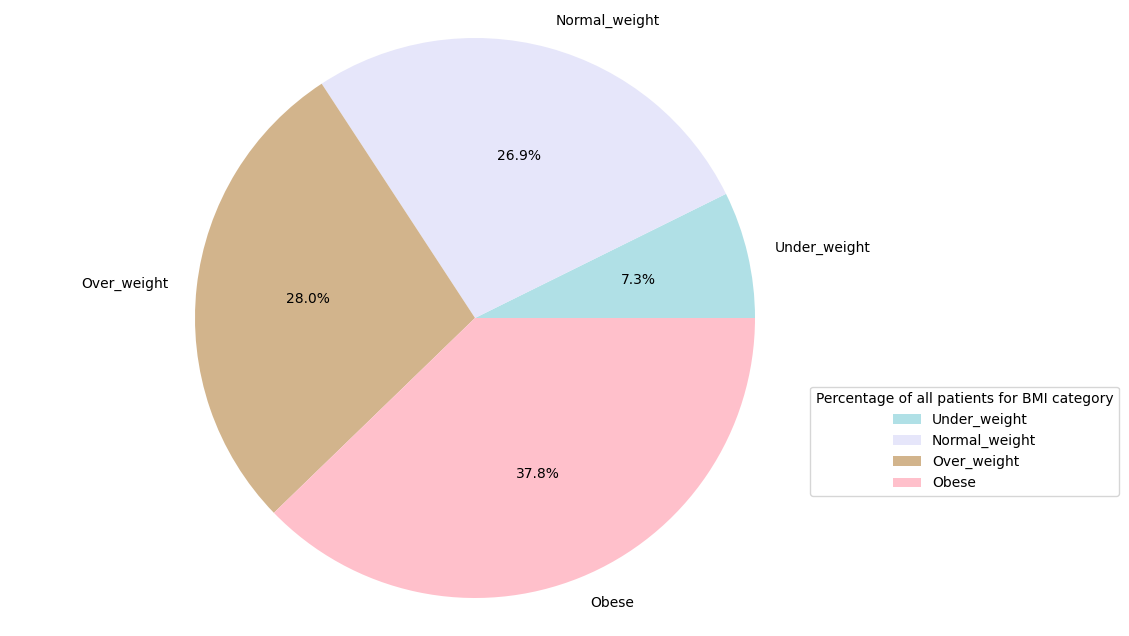

In [39]:
fig1, ax1 = plt.subplots(figsize=(12,8))
ax1.pie(x=[df[df['bmi'] <= 18.5]['stroke'].value_counts()[0] , 
df[(df['bmi'] <= 25) & (df['bmi'] > 18)]['stroke'].value_counts()[0] , 
df[(df['bmi'] <= 30) & (df['bmi'] > 25)]['stroke'].value_counts()[0] , 
df[df['bmi'] > 30]['stroke'].value_counts()[0] ], 
labels=['Under_weight','Normal_weight','Over_weight','Obese'] , 
pctdistance=0.6 , radius=6  , autopct='%1.1f%%' , 
colors=['powderblue','lavender','tan','pink'] )

ax1.axis('equal')
plt.legend(title = "Percentage of all patients for BMI category" , loc=1 , bbox_to_anchor=(1.2, 0.4))
plt.show() 


In [40]:
df2= df.copy()
bins=[0,18,25,30,100]
labels=['0-18','18-25','25-30','30-100']
df2['bmi_cat']=pd.cut(df['bmi'],bins=bins,labels=labels)
bmi_group = df2.groupby(['bmi_cat', 'stroke'])['id'].count().reset_index(name='count')
bmi_group

,bmi_cat,stroke,count
0,0-18,0,288
1,0-18,1,1
2,18-25,0,1281
3,18-25,1,37
4,25-30,0,1334
5,25-30,1,75
6,30-100,0,1797
7,30-100,1,96


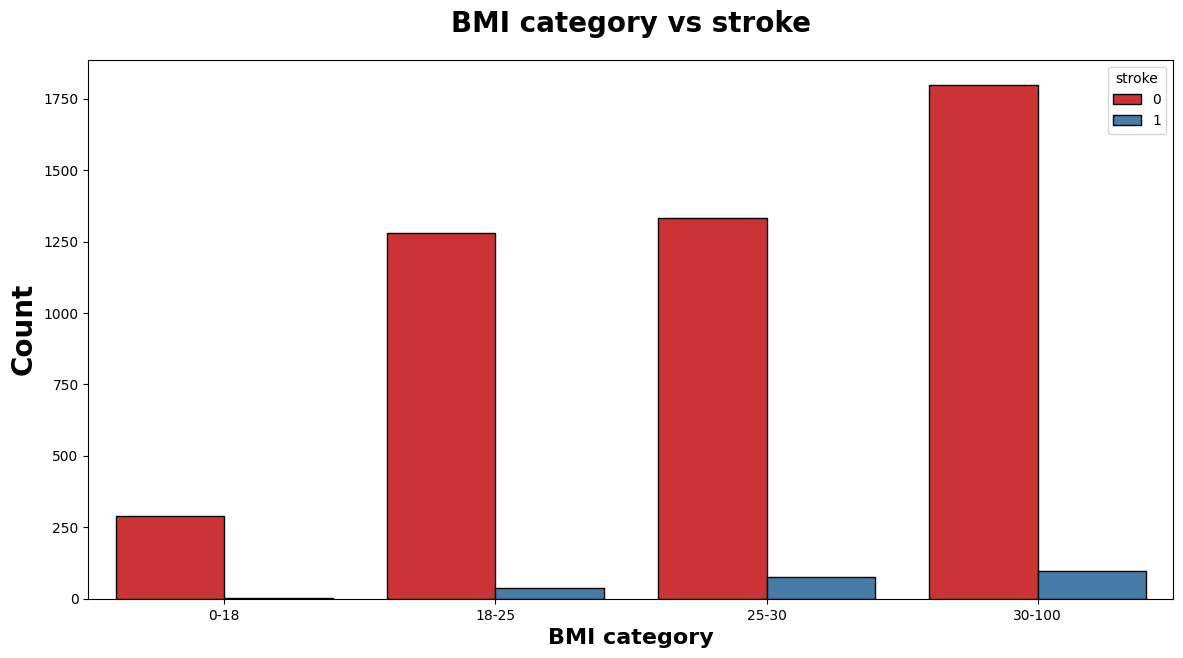

In [41]:
plt.subplots(figsize=(14,7))
sns.countplot(x="bmi_cat",hue="stroke", data=df2,ec = "black",palette="Set1")
plt.title("BMI category vs stroke", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("BMI category", weight="bold", fontsize=16)
plt.show()

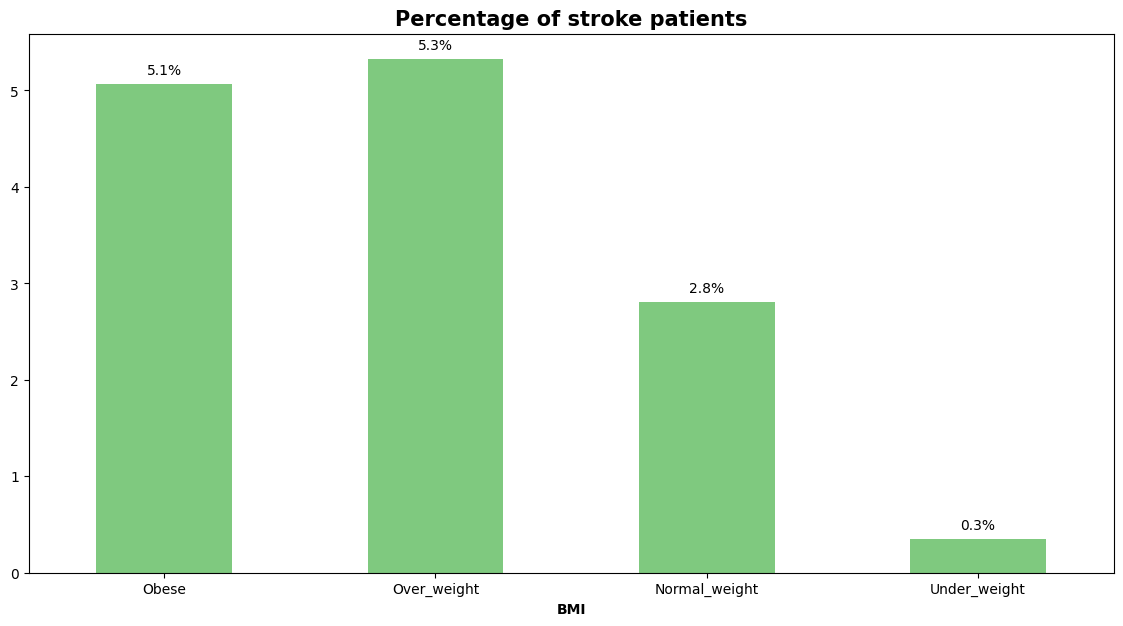

In [42]:
plt.subplots(figsize=(14,7))

(100*df2[df2["stroke"].isin([1])]['bmi_cat'].value_counts()/df2['bmi_cat'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of stroke patients" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["stroke"].isin([1])]['bmi_cat'].value_counts()/df2['bmi_cat'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')
    
plt.xlabel('BMI' , fontweight ='bold')
plt.xticks(ticks=[0,1,2,3], labels=['Under_weight','Normal_weight','Over_weight','Obese'][::-1] ,rotation=0)
plt.show()

Heark disease vs Stroke

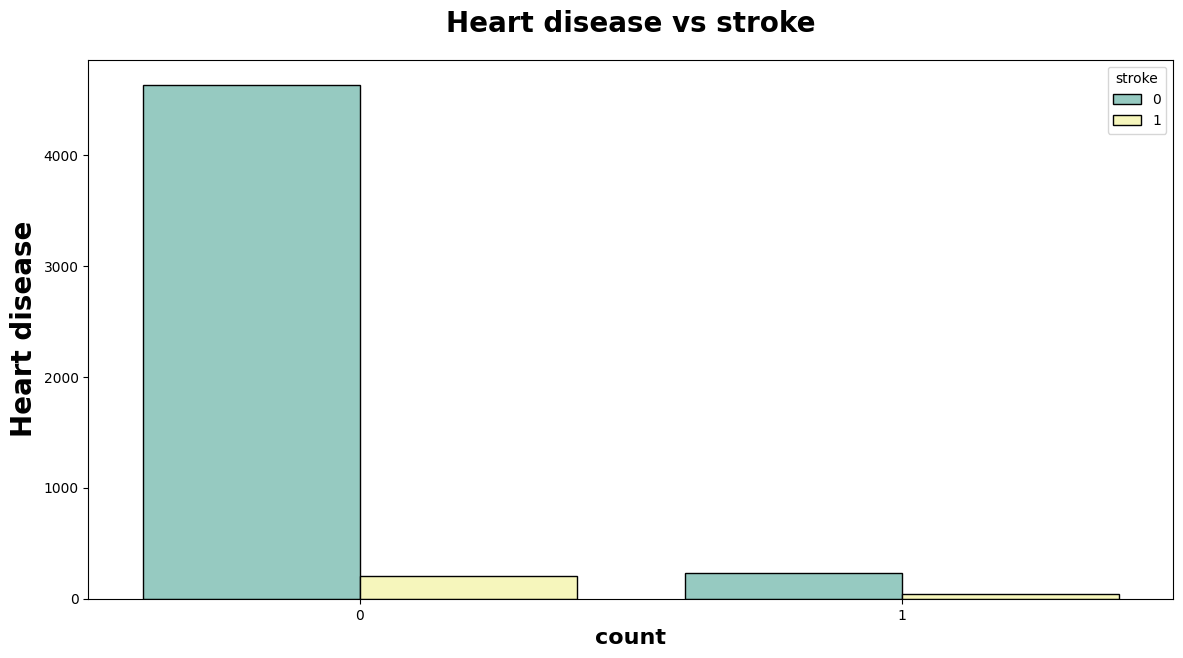

In [43]:
plt.subplots(figsize=(14,7))
sns.countplot(x="heart_disease",hue='stroke', data=df,ec = "black",palette="Set3")
plt.title("Heart disease vs stroke", weight="bold",fontsize=20, pad=20)
plt.ylabel("Heart disease", weight="bold", fontsize=20)
plt.xlabel("count", weight="bold", fontsize=16)
plt.show()

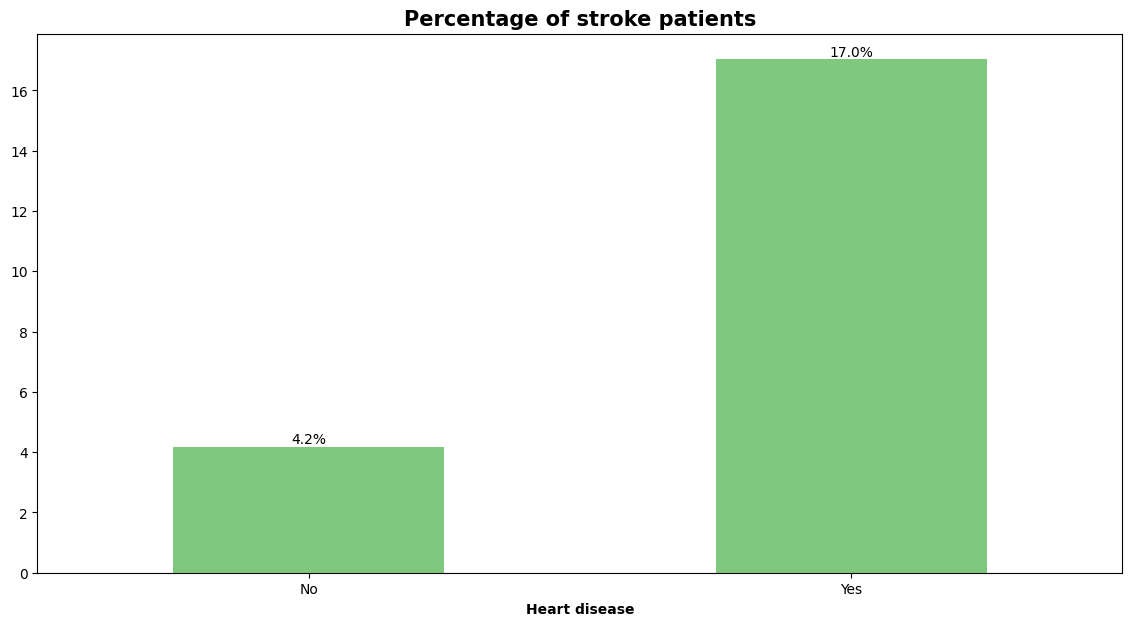

In [44]:
plt.subplots(figsize=(14,7))

(100*df2[df2["stroke"].isin([1])]['heart_disease'].value_counts()/df2['heart_disease'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of stroke patients" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["stroke"].isin([1])]['heart_disease'].value_counts()/df2['heart_disease'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')
    
plt.xlabel('Heart disease' , fontweight ='bold')
plt.xticks(ticks=[0,1], labels=['No', 'Yes'] ,rotation=0)
plt.show()

Does marriage have any effect on the stroke

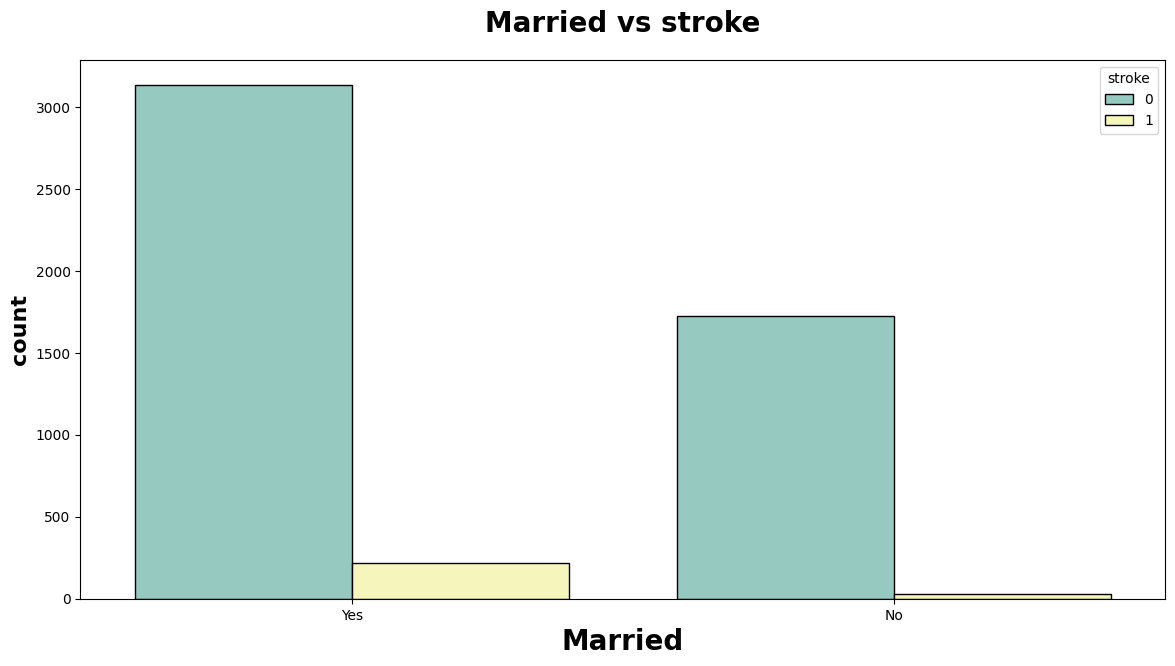

In [45]:
plt.subplots(figsize=(14,7))
sns.countplot(x="ever_married",hue='stroke', data=df,ec = "black",palette="Set3")
plt.title("Married vs stroke", weight="bold",fontsize=20, pad=20)
plt.xlabel("Married", weight="bold", fontsize=20)
plt.ylabel("count", weight="bold", fontsize=16)
plt.show()

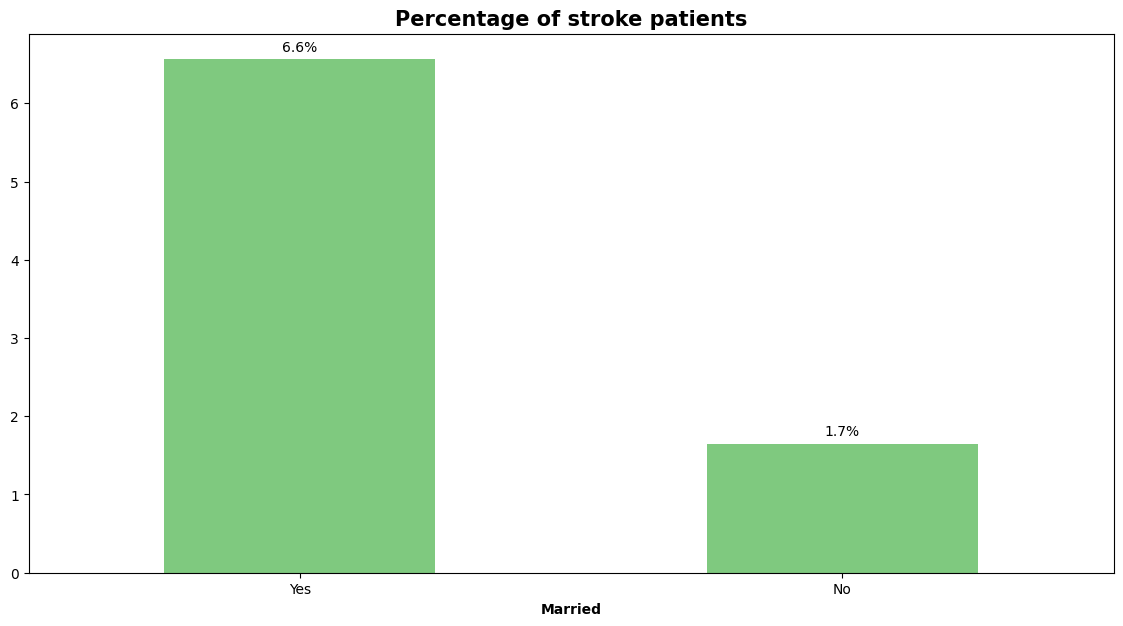

In [46]:
plt.subplots(figsize=(14,7))

(100*df2[df2["stroke"].isin([1])]['ever_married'].value_counts()/df2['ever_married'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of stroke patients" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["stroke"].isin([1])]['ever_married'].value_counts()/df2['ever_married'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')
    
plt.xlabel('Married' , fontweight ='bold')
plt.xticks(ticks=[0,1], labels=['Yes', 'No'] ,rotation=0)
plt.show()

Work type vs Stroke

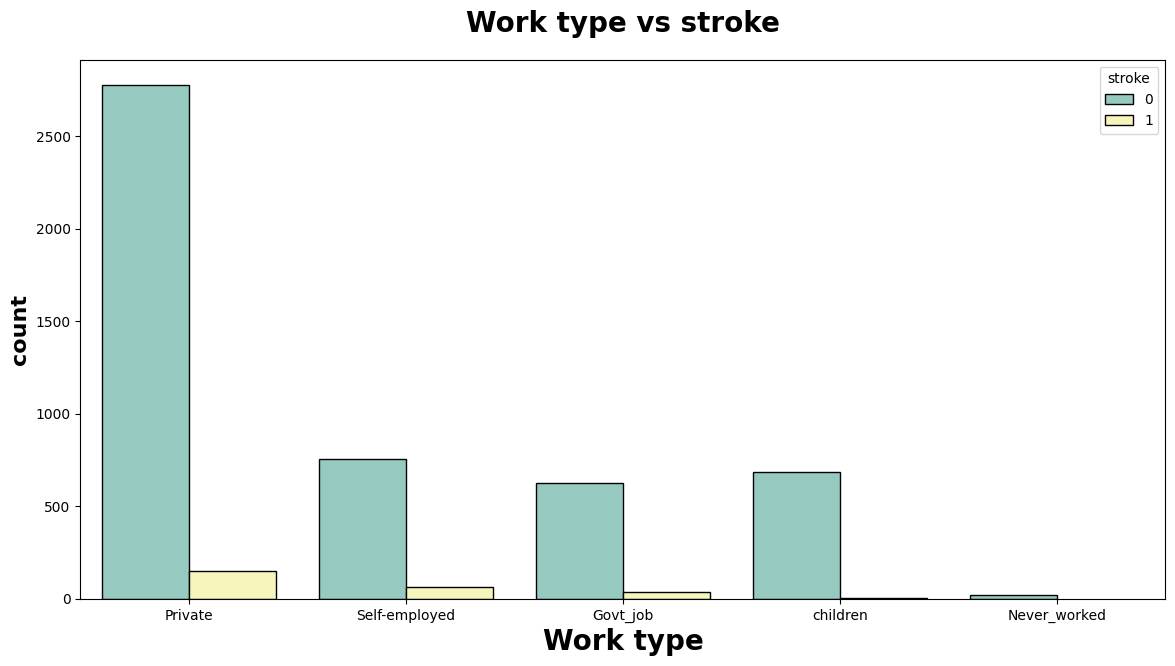

In [47]:
plt.subplots(figsize=(14,7))
sns.countplot(x="work_type",hue='stroke', data=df,ec = "black",palette="Set3")
plt.title("Work type vs stroke", weight="bold",fontsize=20, pad=20)
plt.xlabel("Work type", weight="bold", fontsize=20)
plt.ylabel("count", weight="bold", fontsize=16)
plt.show()

In [48]:
df2 = df.copy()
df2['work_type'] = np.where(df2['work_type'] == 'children', 'Never_worked', df2['work_type'])

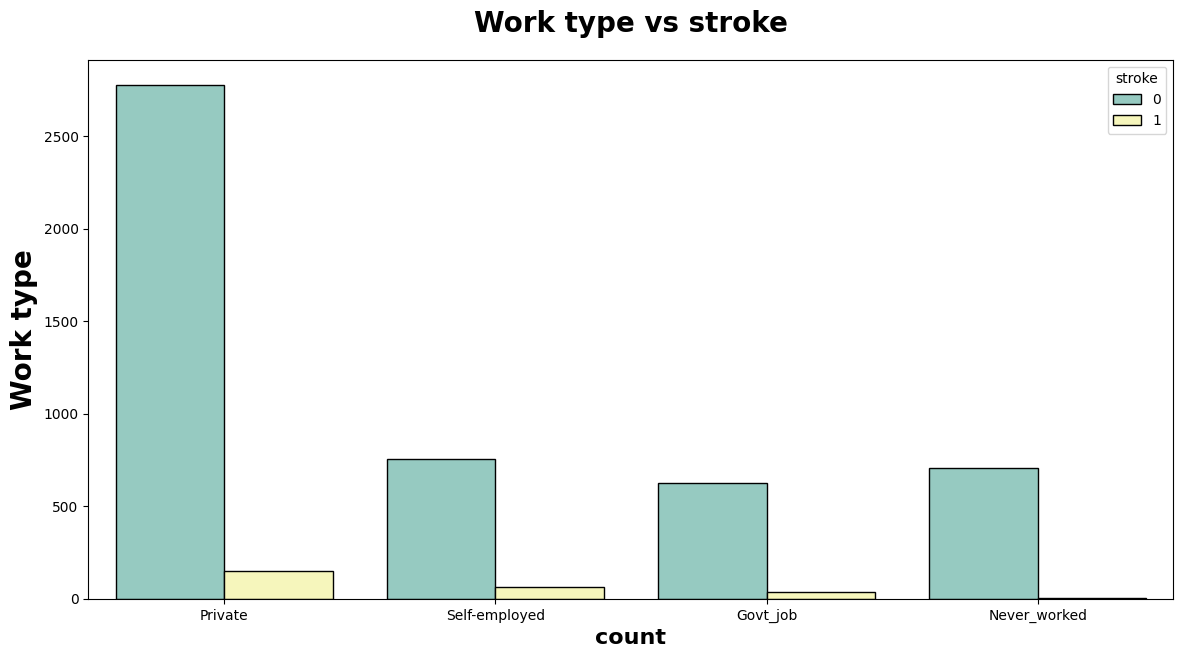

In [49]:
plt.subplots(figsize=(14,7))
sns.countplot(x="work_type",hue='stroke', data=df2,ec = "black",palette="Set3")
plt.title("Work type vs stroke", weight="bold",fontsize=20, pad=20)
plt.ylabel("Work type", weight="bold", fontsize=20)
plt.xlabel("count", weight="bold", fontsize=16)
plt.show()

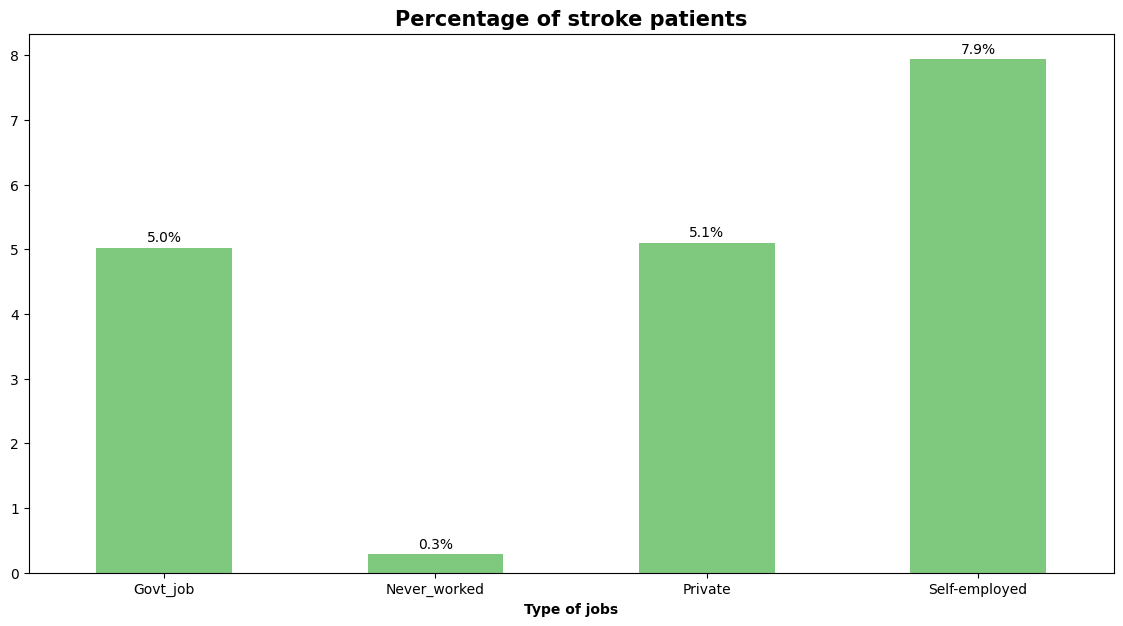

In [50]:
plt.subplots(figsize=(14,7))

(100*df2[df2["stroke"].isin([1])]['work_type'].value_counts()/df2['work_type'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent' )
plt.title("Percentage of stroke patients" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["stroke"].isin([1])]['work_type'].value_counts()/df2['work_type'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')
    
plt.xlabel('Type of jobs' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

Resident type vs stroke

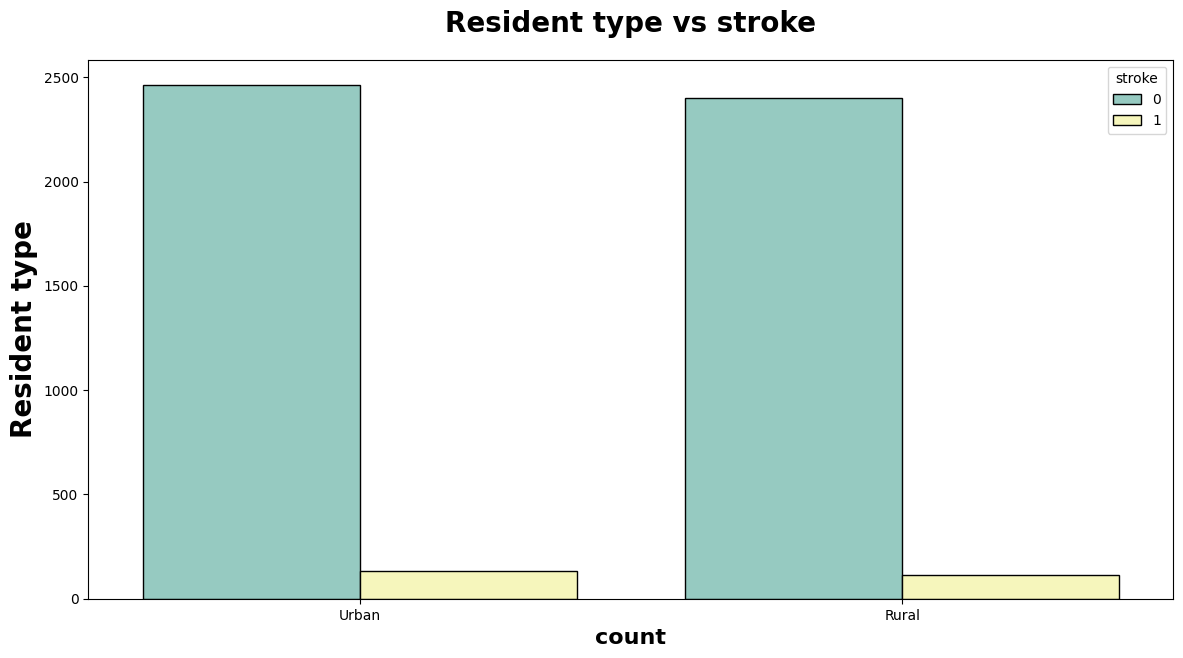

In [51]:
plt.subplots(figsize=(14,7))
sns.countplot(x="Residence_type",hue='stroke', data=df2,ec = "black",palette="Set3")
plt.title("Resident type vs stroke", weight="bold",fontsize=20, pad=20)
plt.ylabel("Resident type", weight="bold", fontsize=20)
plt.xlabel("count", weight="bold", fontsize=16)
plt.show()

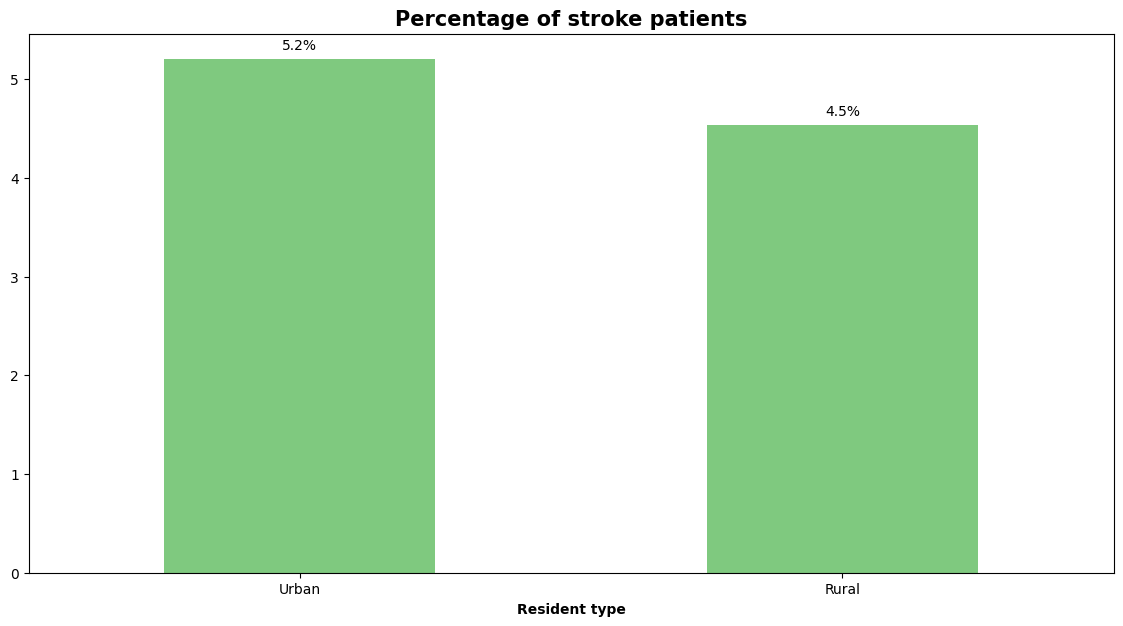

In [52]:
plt.subplots(figsize=(14,7))

(100*df2[df2["stroke"].isin([1])]['Residence_type'].value_counts()/df2['Residence_type'].value_counts()).plot(kind='bar',stacked=True , colormap='Accent' )
plt.title("Percentage of stroke patients" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["stroke"].isin([1])]['Residence_type'].value_counts()/df2['Residence_type'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')
    
plt.xlabel('Resident type' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

Effect of glucose level

<Axes: xlabel='avg_glucose_level', ylabel='Count'>

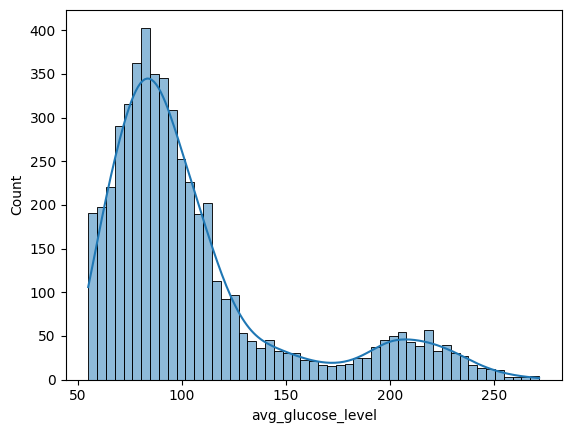

In [53]:
sns.histplot(df.avg_glucose_level,kde=True)

In [54]:
df.avg_glucose_level.min(), df.avg_glucose_level.max()

(55.12, 271.74)

In [55]:
bins= [0,70,140,200, 300]
labels = ['low','Normal','High','Diabetic']
df2 = df.copy()
df2['glucose_cat'] = pd.cut(df['avg_glucose_level'], bins=bins, labels=labels, right=False)
age_group = df2.groupby(['glucose_cat', 'stroke'])['id'].count().reset_index(name='count')
age_group

,glucose_cat,stroke,count
0,low,0,727
1,low,1,27
2,Normal,0,3406
3,Normal,1,129
4,High,0,350
5,High,1,37
6,Diabetic,0,378
7,Diabetic,1,56


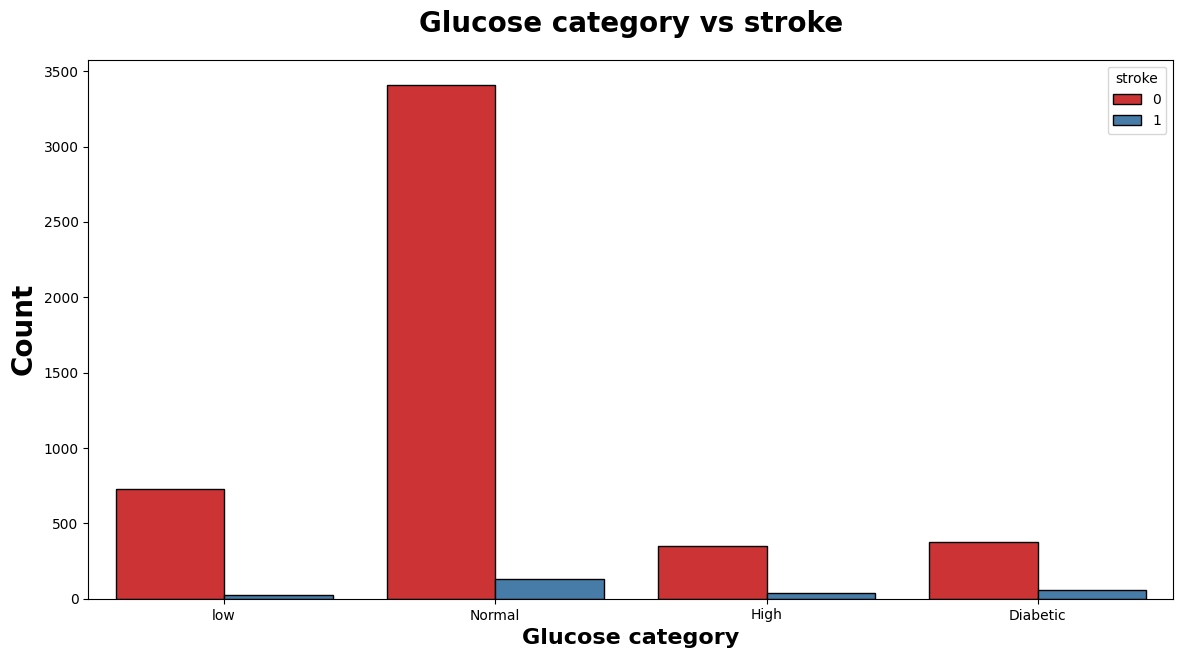

In [56]:
plt.subplots(figsize=(14,7))
sns.countplot(x="glucose_cat",hue="stroke", data=df2,ec = "black",palette="Set1")
plt.title("Glucose category vs stroke", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("Glucose category", weight="bold", fontsize=16)
plt.show()

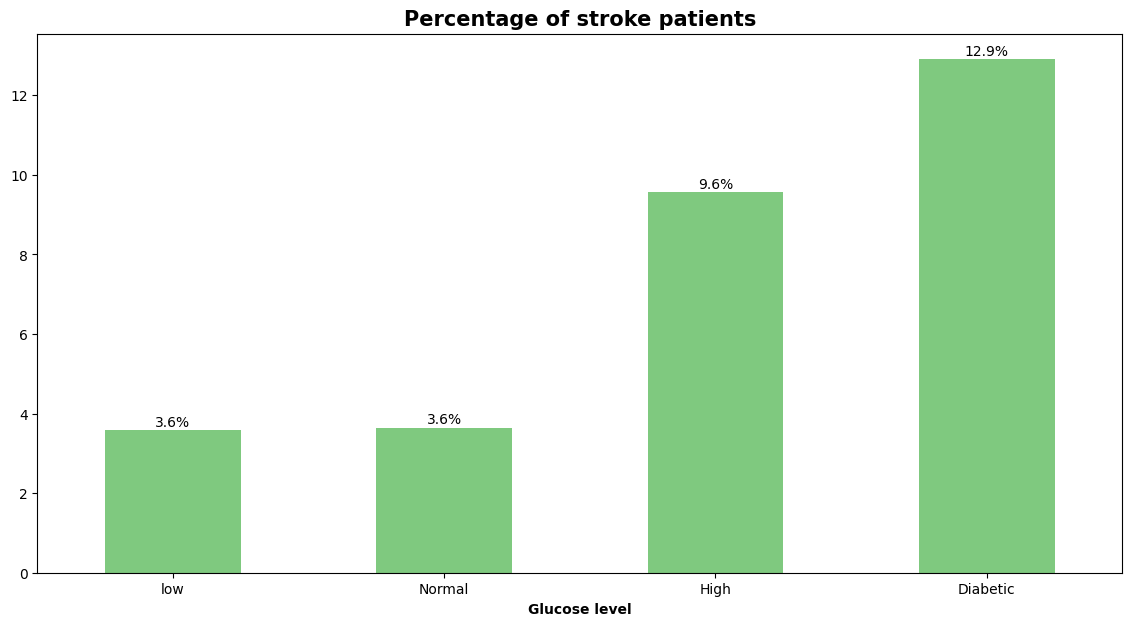

In [57]:
plt.subplots(figsize=(14,7))

(100*df2[df2["stroke"].isin([1])]['glucose_cat'].value_counts()/df2['glucose_cat'].value_counts()).plot(kind='bar',stacked=True , colormap='Accent' )
plt.title("Percentage of stroke patients" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["stroke"].isin([1])]['glucose_cat'].value_counts()/df2['glucose_cat'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')
    
plt.xlabel('Glucose level' , fontweight ='bold')
plt.xticks(ticks=[0,1,2,3], labels = ['low','Normal','High','Diabetic'] ,rotation=0)
plt.show()

**smoking status vs stroke**

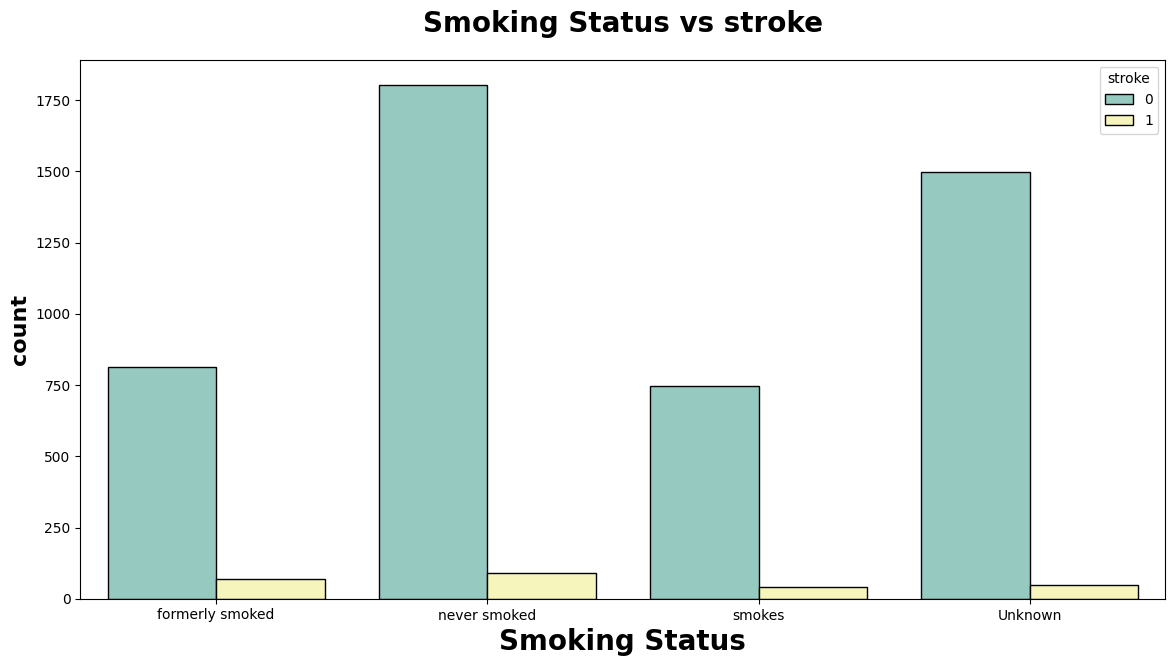

In [58]:
plt.subplots(figsize=(14,7))
sns.countplot(x="smoking_status",hue='stroke', data=df2,ec = "black",palette="Set3")
plt.title("Smoking Status vs stroke", weight="bold",fontsize=20, pad=20)
plt.xlabel("Smoking Status", weight="bold", fontsize=20)
plt.ylabel("count", weight="bold", fontsize=16)
plt.show()

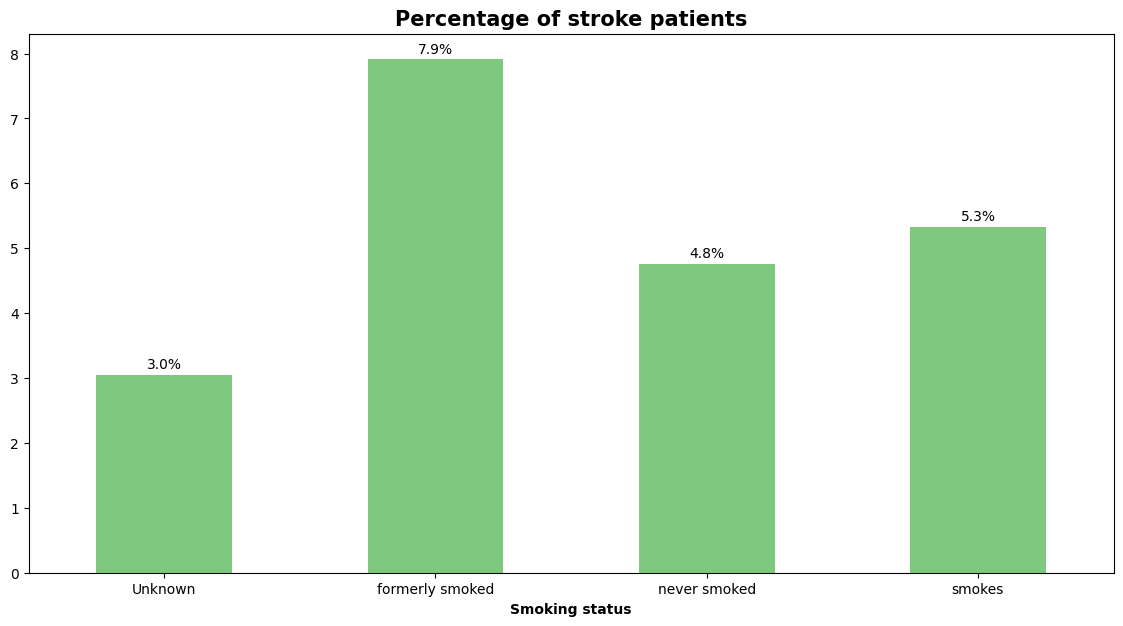

In [59]:
plt.subplots(figsize=(14,7))
(100*df2[df2["stroke"].isin([1])]['smoking_status'].value_counts()/df2['smoking_status'].value_counts()).plot(kind='bar',stacked=True , colormap='Accent' )
plt.title("Percentage of stroke patients" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["stroke"].isin([1])]['smoking_status'].value_counts()/df2['smoking_status'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')
    
plt.xlabel('Smoking status' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

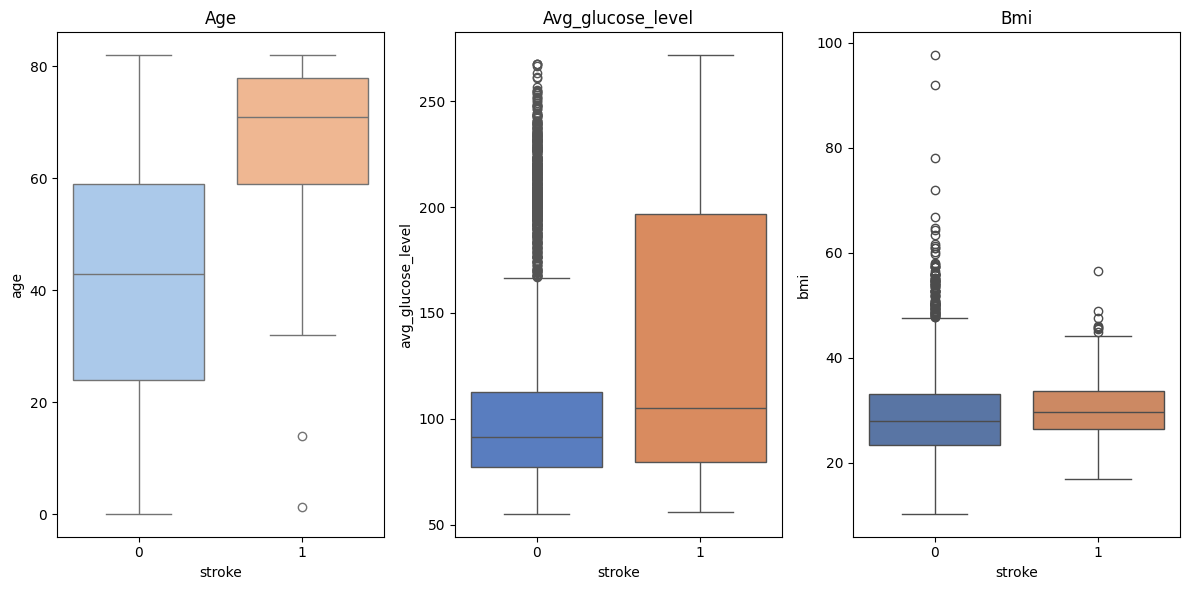

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

column_list = ['age', 'avg_glucose_level', 'bmi']
colors = ['pastel', 'muted', 'deep']  # You can use any seaborn palette names

fig, ax = plt.subplots(1, 3, figsize=(12, 6))

for i, col in enumerate(column_list):
    sns.boxplot(data=df, x='stroke', y=col, ax=ax[i], palette=colors[i])
    ax[i].set_title(col.capitalize())

plt.tight_layout()
plt.show()

**Final Report**